In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

In [3]:
df_feat = pd.read_csv('.\\dataset and all\\training_set_features.csv')
df_label = pd.read_csv('.\\dataset and all\\training_set_labels.csv')

In [4]:
df_feat.isnull().sum() *100 / len(df_feat)

respondent_id                   0.000000
xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

Plotting the data

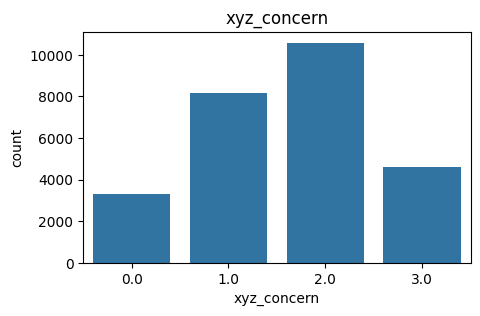

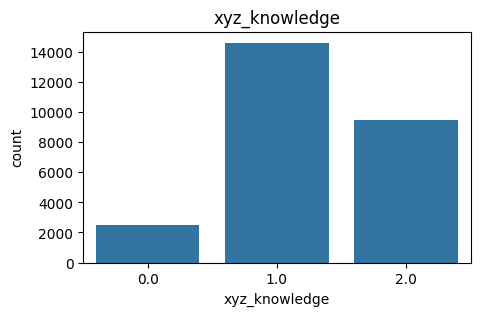

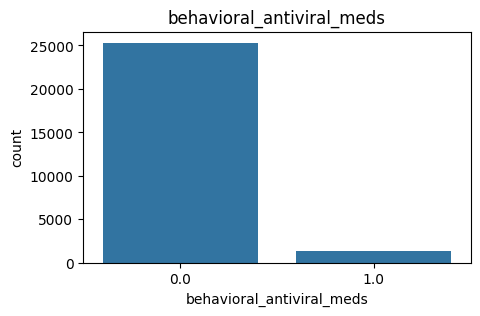

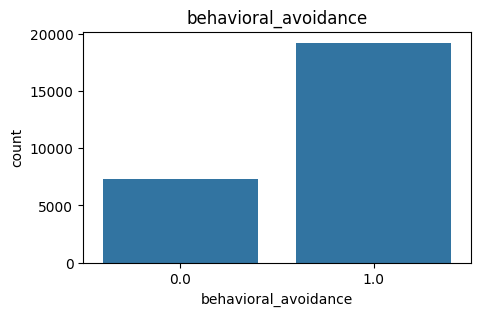

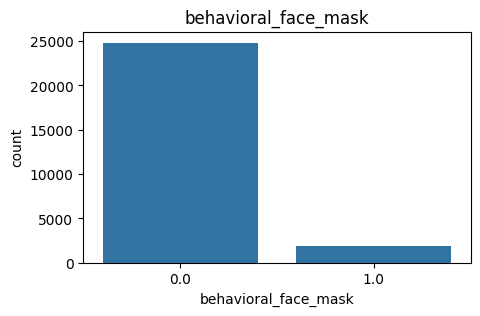

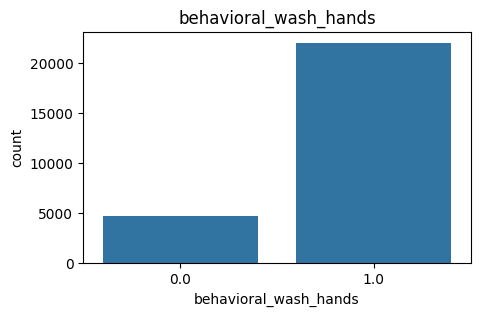

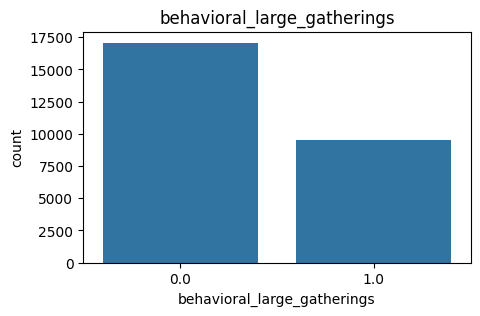

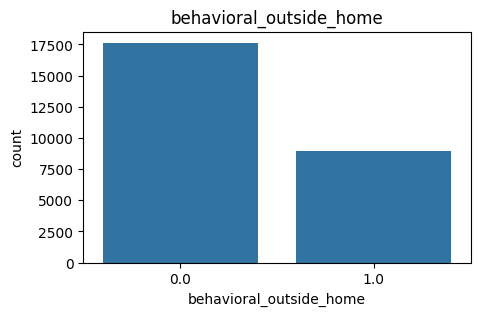

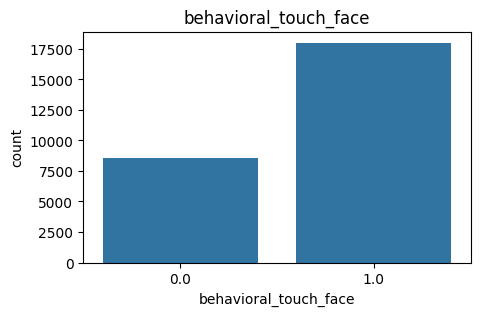

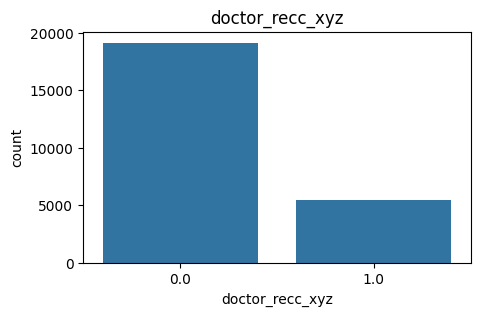

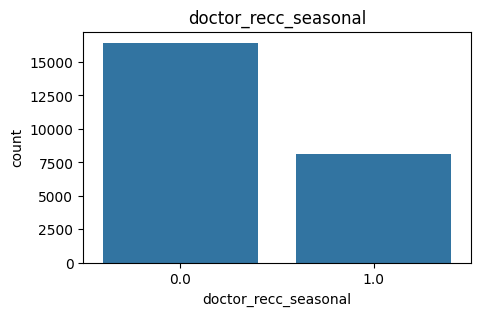

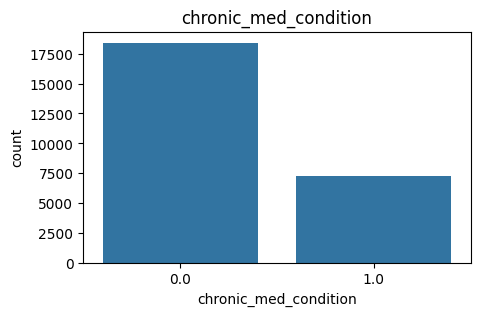

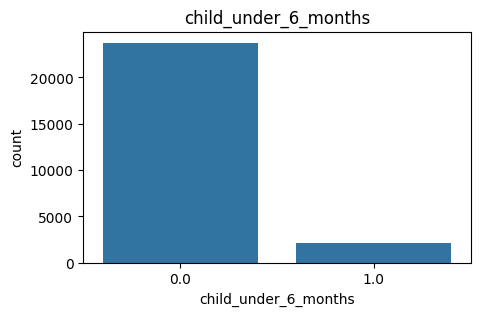

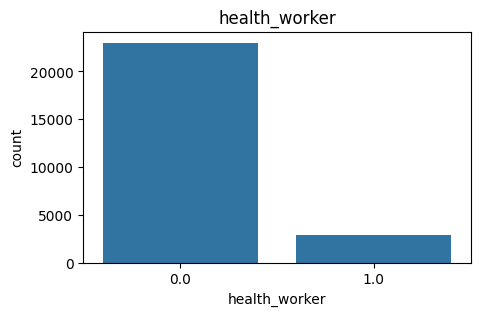

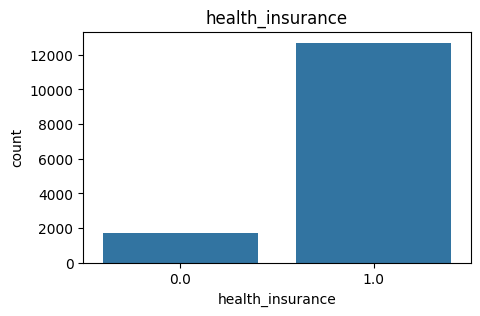

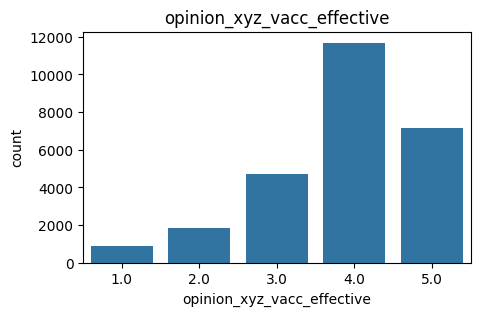

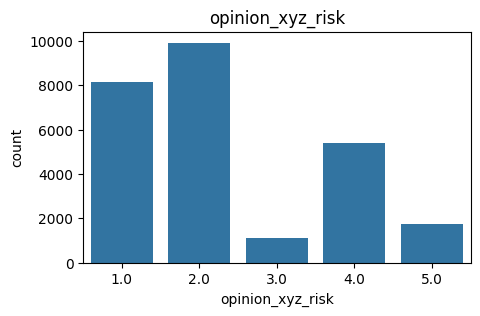

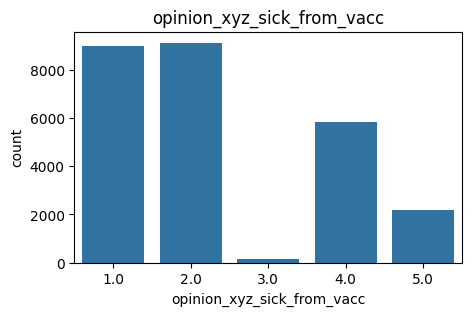

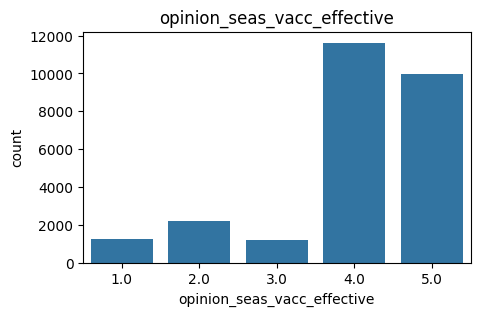

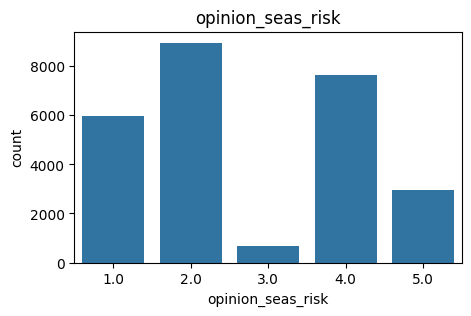

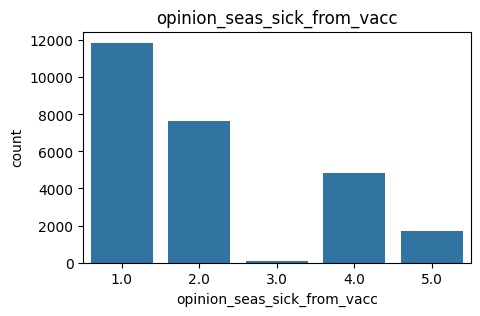

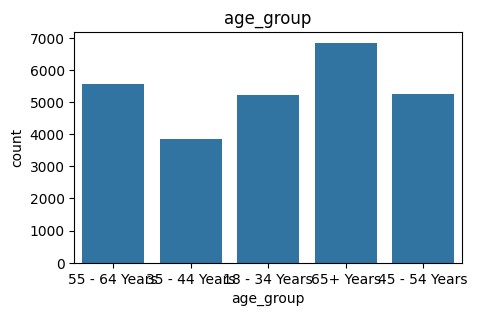

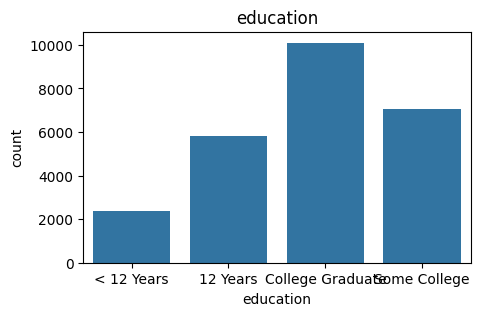

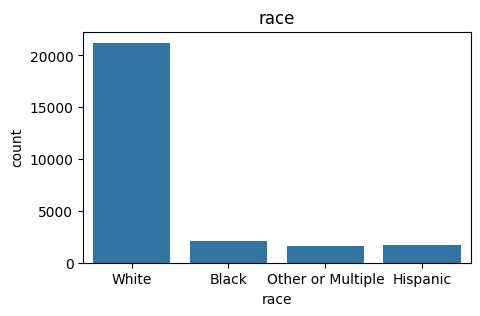

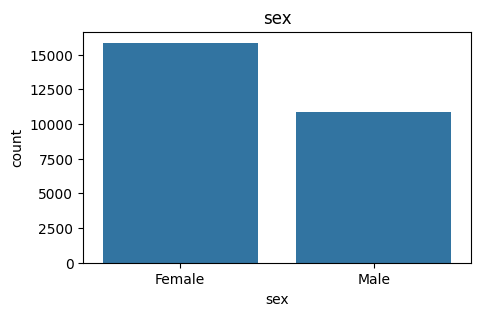

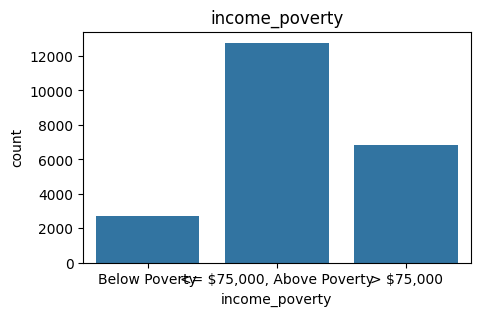

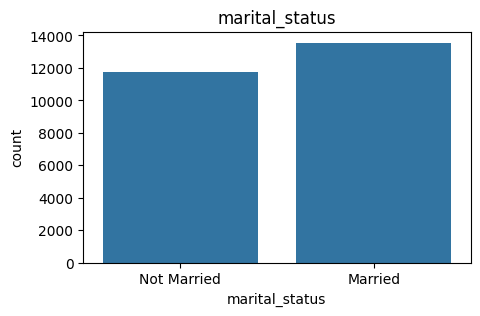

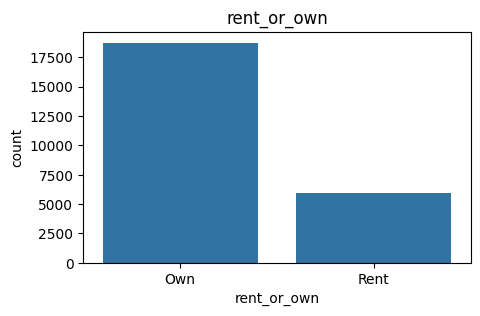

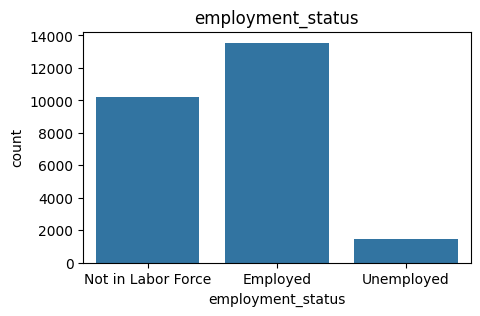

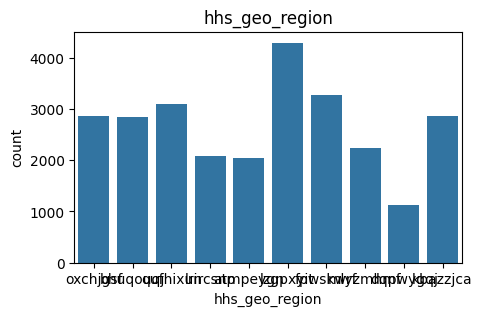

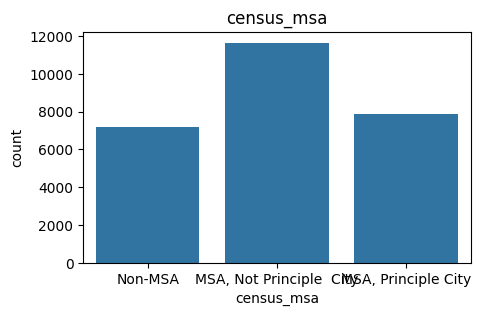

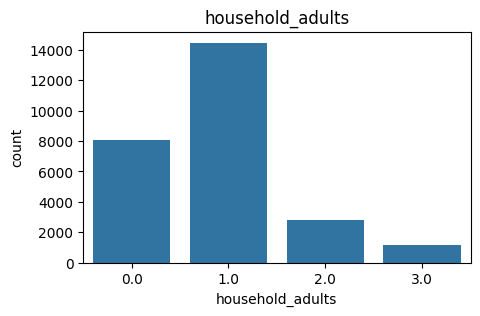

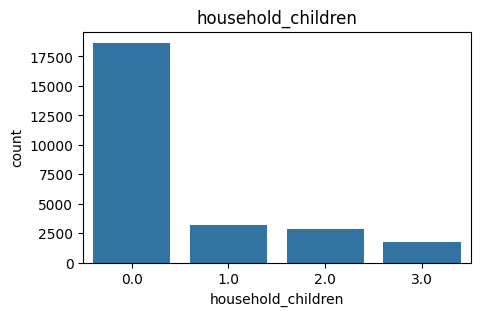

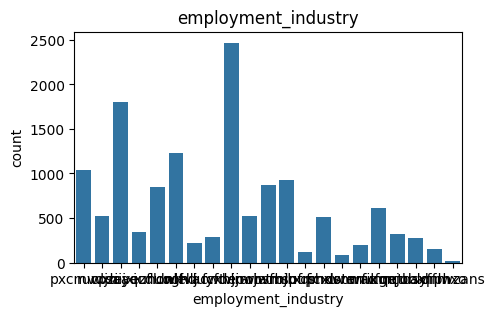

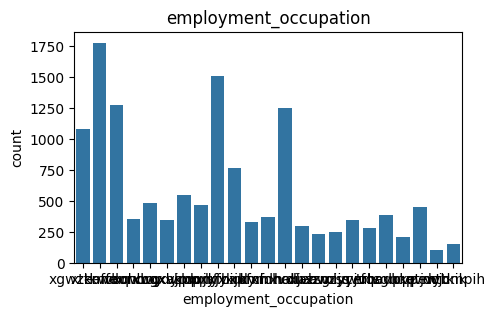

In [5]:
head = list(df_feat.columns.values)

for column in head[1:]:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=column, data=df_feat)
    plt.title(column)
    plt.show()


In [6]:
print(df_feat['household_adults'].mode()[0])
df_feat.isnull()

1.0


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
26703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26704,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,True
26705,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Formatting Data

In [7]:
for column in df_feat.columns:
    mode_val = df_feat[column].mode()[0]
    df_feat.fillna({column: mode_val}, inplace=True)

Splitting data and encoding

In [8]:
df_feat_new = df_feat.drop(columns = ['respondent_id'])

In [9]:
numeric_features = df_feat_new.select_dtypes(exclude=['object']).columns
categorical_features = df_feat_new.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder( handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

df_feat_pro = preprocessor.fit_transform(df_feat_new)


In [10]:
df_feat_train, df_feat_test, df_label_train, df_label_test = train_test_split(df_feat_pro, df_label.drop(columns=['respondent_id']), test_size=0.2, random_state=42)

Processing

In [11]:
model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(df_feat_train, df_label_train)

prediction = model.predict_proba(df_feat_test)

xyz_pred_prob = prediction[0][:, 1]
flu_pred_prob = prediction[1][:, 1]

Testing Accuracy

In [12]:
roc_auc_xyz = roc_auc_score(df_label_test['xyz_vaccine'], xyz_pred_prob)
roc_auc_seasonal = roc_auc_score(df_label_test['seasonal_vaccine'], flu_pred_prob)
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal)/2

print(f'ROC AUC for XYZ Vaccine: {roc_auc_xyz}')
print(f'ROC AUC for Seasonal Vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')

ROC AUC for XYZ Vaccine: 0.8302438670801503
ROC AUC for Seasonal Vaccine: 0.8526073334132108
Mean ROC AUC: 0.8414256002466806


Submission

In [20]:
test = pd.read_csv('.\\dataset and all\\test_set_features.csv')

In [21]:
for column in test.columns:
    mode_val = test[column].mode()[0]
    test.fillna({column: mode_val}, inplace=True)


In [22]:
test_new = test.drop(columns = ['respondent_id'])

In [23]:
test_pro = preprocessor.fit_transform(test_new)

In [26]:
final_pred = model.predict_proba(test_pro)

xyz_test_pred_prob = final_pred[0][:, 1]
flu_test_pred_prob = final_pred[1][:, 1]

In [27]:
sub = pd.DataFrame()
sub['respondent_id'] = test['respondent_id']
sub['xyz_vaccine'] = xyz_test_pred_prob
sub['seasonal_vaccine'] = flu_test_pred_prob

In [28]:
sub.to_csv('submission.csv', index=False)